<h1>  <center>  A Quick Start to TensorFlow with Python  </center> </h1> 

I will use this repository more like a notebook for my TensorFlow class in which I follow the learning tutorials of [TensorFlow](https://www.tensorflow.org/tutorials). I will try to use whatever I learn about TensorFlow in a basic exersice and save it here. I think

## Image Classification

In order to install the current stable relase of GPU-TensorFlow and Keras on your Windows Machine, you should go to your Anaconda Prompt (If you are using other python distributions you can simple google it) and type: 

```python
conda create -n tf-gpu tensorflow-gpu
conda activate tf-gpu
conda install -c conda-forge keras 
```


Let us first import tensorflow and keras

In [1]:
import tensorflow as tf
import keras 

Using TensorFlow backend.


For the sake of exercise, I will use MNIST dataset from Keras's datasets library. It is a bunch of labeled images of handwritten digits. So, we will try to build a simple neural network model to predict the handwritten digit by looking at its image. 

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

How does a single training image look like? By running the code below, we get the visualization of it. 

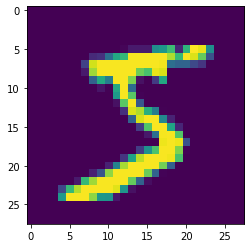

Figure above is labeled as 5


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X_train[0])
plt.show()
print('Figure above is labeled as', y_train[0])

In order to channel it to a neural network, we need to know the shape of our data. 

In [4]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)


## Normalize and Reshape the Data 

As seen above, our train data is a 3-dims one. We 60,000 images of size 28x28 pixels. At each pixel we have a number between 0-255 (RGB value). We need to normalize this data. Even though there are multiple way of normalizing data, I simply divide it by 255, which is the maximum possible value. 

On the other hand, my output should be a vector of size 10 instead of a scalar. Hence, using  keras.utils.np_utils.to_categorical I will convert them into vectors of size 10 such that if the original value was 5, then in the transformed vector the 5th entry will be one while all ohter cells are zero. 

In [5]:
# To avoid division problems, make sure that the data is float32
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')

# Normalizing the data
X_train /= 255
X_valid /= 255

from keras.utils.np_utils import to_categorical 
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Number of images in training set:', X_train.shape[0])
print('Number of images in validation set:', X_valid.shape[0])

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000, 10)
Number of images in training set: 60000
Number of images in validation set: 10000


## Building A Neural Network Model

Using Keras API, I will build a simple neural network model with one hidden layer. Even though you are free in creating the architecture of the network, fo. 

In [6]:
from keras.models import Sequential 
from keras.layers import Flatten, Dense

# Now I can build a model with one hidden layer.
model = Sequential()
# add input layer
model.add(Flatten(input_shape=(28, 28)))

# add a hidden layer
model.add(Dense(128, activation='relu'))

# we have 10 different labels at the end of the network 
model.add(Dense(10, activation='softmax'))

# compile the model with an appropriate loss function and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

We may now print the summary of our model to see its layers and weights.

In [7]:
# print the summary of the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


We have one input layer, which takes (28x28) shaped input and flattens it to a one dimensional vector of size 28x28 = 784. The input layer feeds these vectors to the hidden layer, which outputs one dimensional vectors of size 128 to the last layer. Lastly, the output layer assigns every data into one of the 10 possible categories. 

We can now train this model by feeding the training data into it. 

In [8]:
# feed our train data in the model to train it and specify the number of epochs
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2608 - accuracy: 0.9261
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.1123 - accuracy: 0.9670
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0773 - accuracy: 0.9774
Epoch 4/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.0574 - accuracy: 0.9828
Epoch 5/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0453 - accuracy: 0.9857


## Evaluate the Model

We have trained our neural network model. It is now time to evaluate its performance on the validation data. 

In [9]:
model.evaluate(X_valid, y_valid, verbose=2)

[0.07416198517300654, 0.9769999980926514]

Our model has an accuracy of 97.5 %. 